In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.DataFrame({
    "Potência (kW)":[120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    "Eficiência (%)":[92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    "Idade (anos)":[3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    "Tamanho m²":[50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    "Consumo de energia":['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente','Ineficiente',
              'Eficiente', 'Ineficiente', 'Eficiente', 'Eficiente','Ineficiente']
    })

In [27]:
X = data[['Potência (kW)', 'Eficiência (%)', 'Tamanho m²', 'Idade (anos)']]

y = data['Consumo de energia']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

In [29]:
model = SVC(kernel= 'linear') 
model.fit(X_train,y_train) 

SVC(kernel='linear')

In [30]:
y_pred = model.predict(X_test)

In [31]:
X_test

,Potência (kW),Eficiência (%),Tamanho m²,Idade (anos)
8,115,88,56,3
1,80,65,45,8
5,130,95,62,2


In [32]:
data.head(20)

,Potência (kW),Eficiência (%),Idade (anos),Tamanho m²,Consumo de energia
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente
5,130,95,2,62,Eficiente
6,70,60,10,40,Ineficiente
7,105,80,6,58,Eficiente
8,115,88,3,56,Eficiente
9,85,70,9,47,Ineficiente


In [34]:
acc = accuracy_score(y_pred,y_test)
acc

1.0

In [35]:
cr=classification_report(y_pred,y_pred)
print(cr)

              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [40]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[2 0]
 [0 1]]


Text(0.5, 1.0, 'Matriz de confusão para o algoritmo SVM')

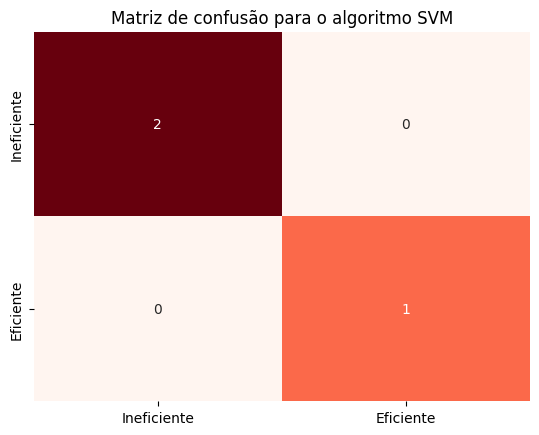

In [51]:
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', cbar=False, 
            xticklabels=['Ineficiente', 'Eficiente'], 
            yticklabels=['Ineficiente','Eficiente'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM')    

Text(0, 0.5, 'Corrente (A)')

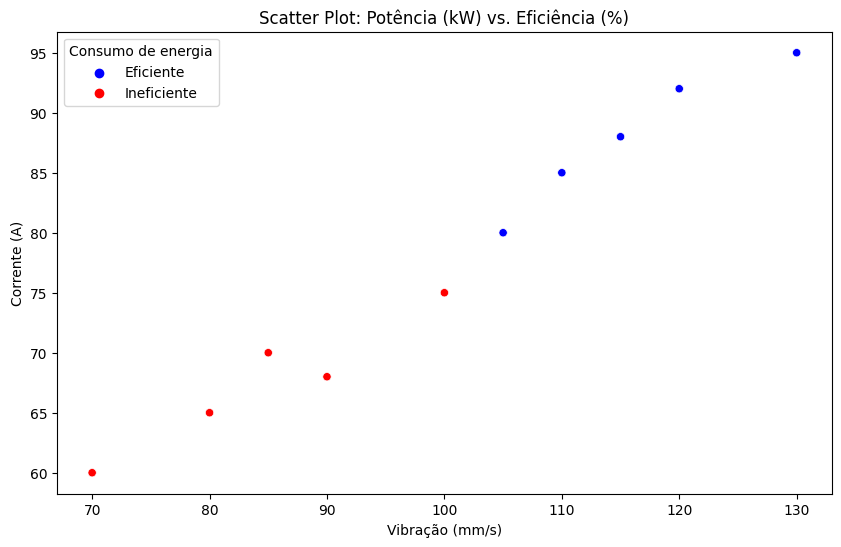

In [57]:
palette = {"Ineficiente":"red","Eficiente":"blue"}
plt.figure(figsize=(10,6))
sns.scatterplot(x='Potência (kW)',y='Eficiência (%)',hue='Consumo de energia',data =data,
                palette = palette)

plt.title('Scatter Plot: Potência (kW) vs. Eficiência (%)')
plt.xlabel('Vibração (mm/s)')
plt.ylabel('Corrente (A)')